In [73]:
%pip install dtw-python
%pip install matplotlib
%pip install datetime
%pip install requests
%pip install numpy
%pip install fastdtw

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Imports

In [74]:
import numpy as np
import requests as req

# Code : Creating a class to request charts from Yahoo api

In [75]:
class Yahoo:
    def __init__(self):
        pass
    
    
    def get_chart(self,symbol:str)->list:
        headers = {
            'x-api-key': "mTd2MNVwEe3WFgj5PQ66Tbpq0CyeP8Q7ESjpmYZ2"
        }
        try:
            url = f"https://yfapi.net/v8/finance/chart/{symbol}?range=3mo&region=FR&interval=1d&lang=en"
            response = req.request("GET", url, headers=headers)
            return response.json()["chart"]["result"][0]["indicators"]["quote"][0]['close']
        
        except Exception as error:
            return error

## Collecting chats

In [76]:
## Finding two different dataset

# Getting Apple chart
reference = Yahoo().get_chart("AAPL")

# Getting Microsoft chart
comparison = Yahoo().get_chart("BTC-USD")

## Using the DTW algorithm

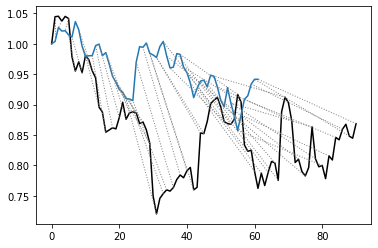

<AxesSubplot:>

In [86]:
from dtw import *

rearange_reference = []
rearange_comparison = []

for value in reference:
    rearange_reference.append(value/reference[0])
    
for value in comparison:
    rearange_comparison.append(value/comparison[0])

# OO method call chain
warping = dtw(rearange_comparison, rearange_reference, keep_internals=True, step_pattern=rabinerJuangStepPattern(6, "c"))

warping.plot(type="twoway",offset=0)

# We want to get the total distance between points.

In [87]:
print(warping.distance)

9.28699313959404
